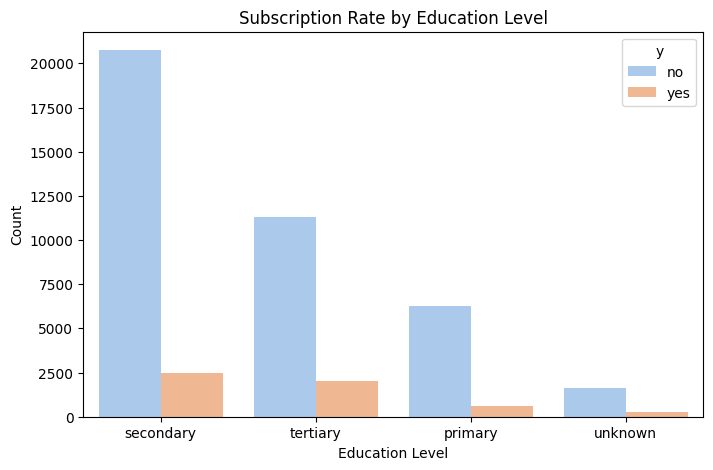

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='education', hue='y', palette="pastel", order=df['education'].value_counts().index)
plt.title("Subscription Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()


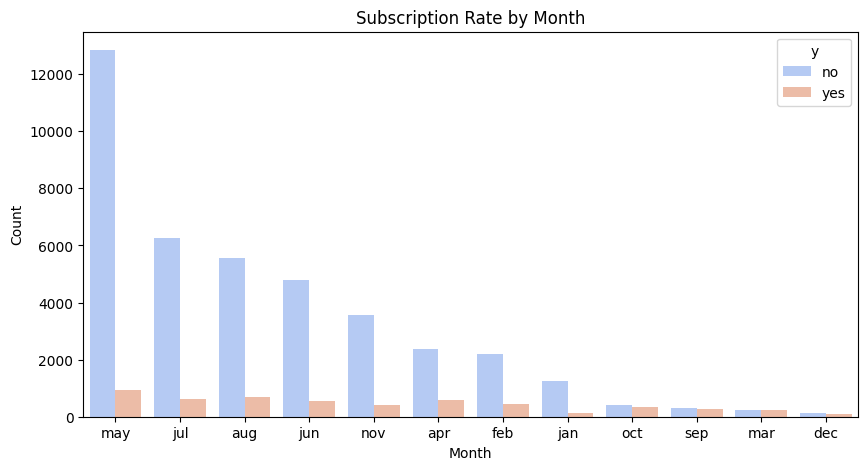

In [57]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='month', hue='y', palette="coolwarm", order=df['month'].value_counts().index)
plt.title("Subscription Rate by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


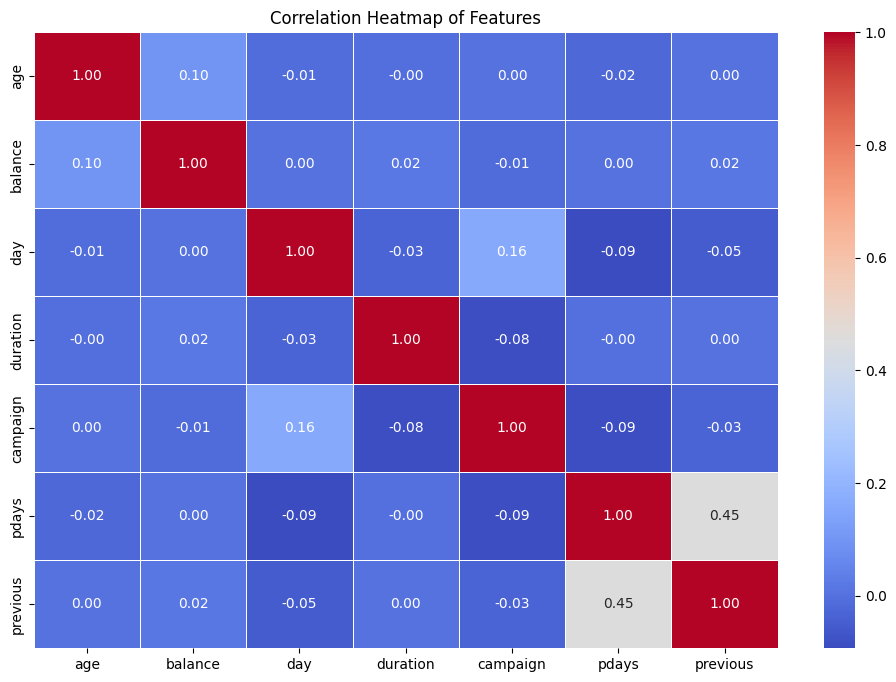

In [102]:
# Generate the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

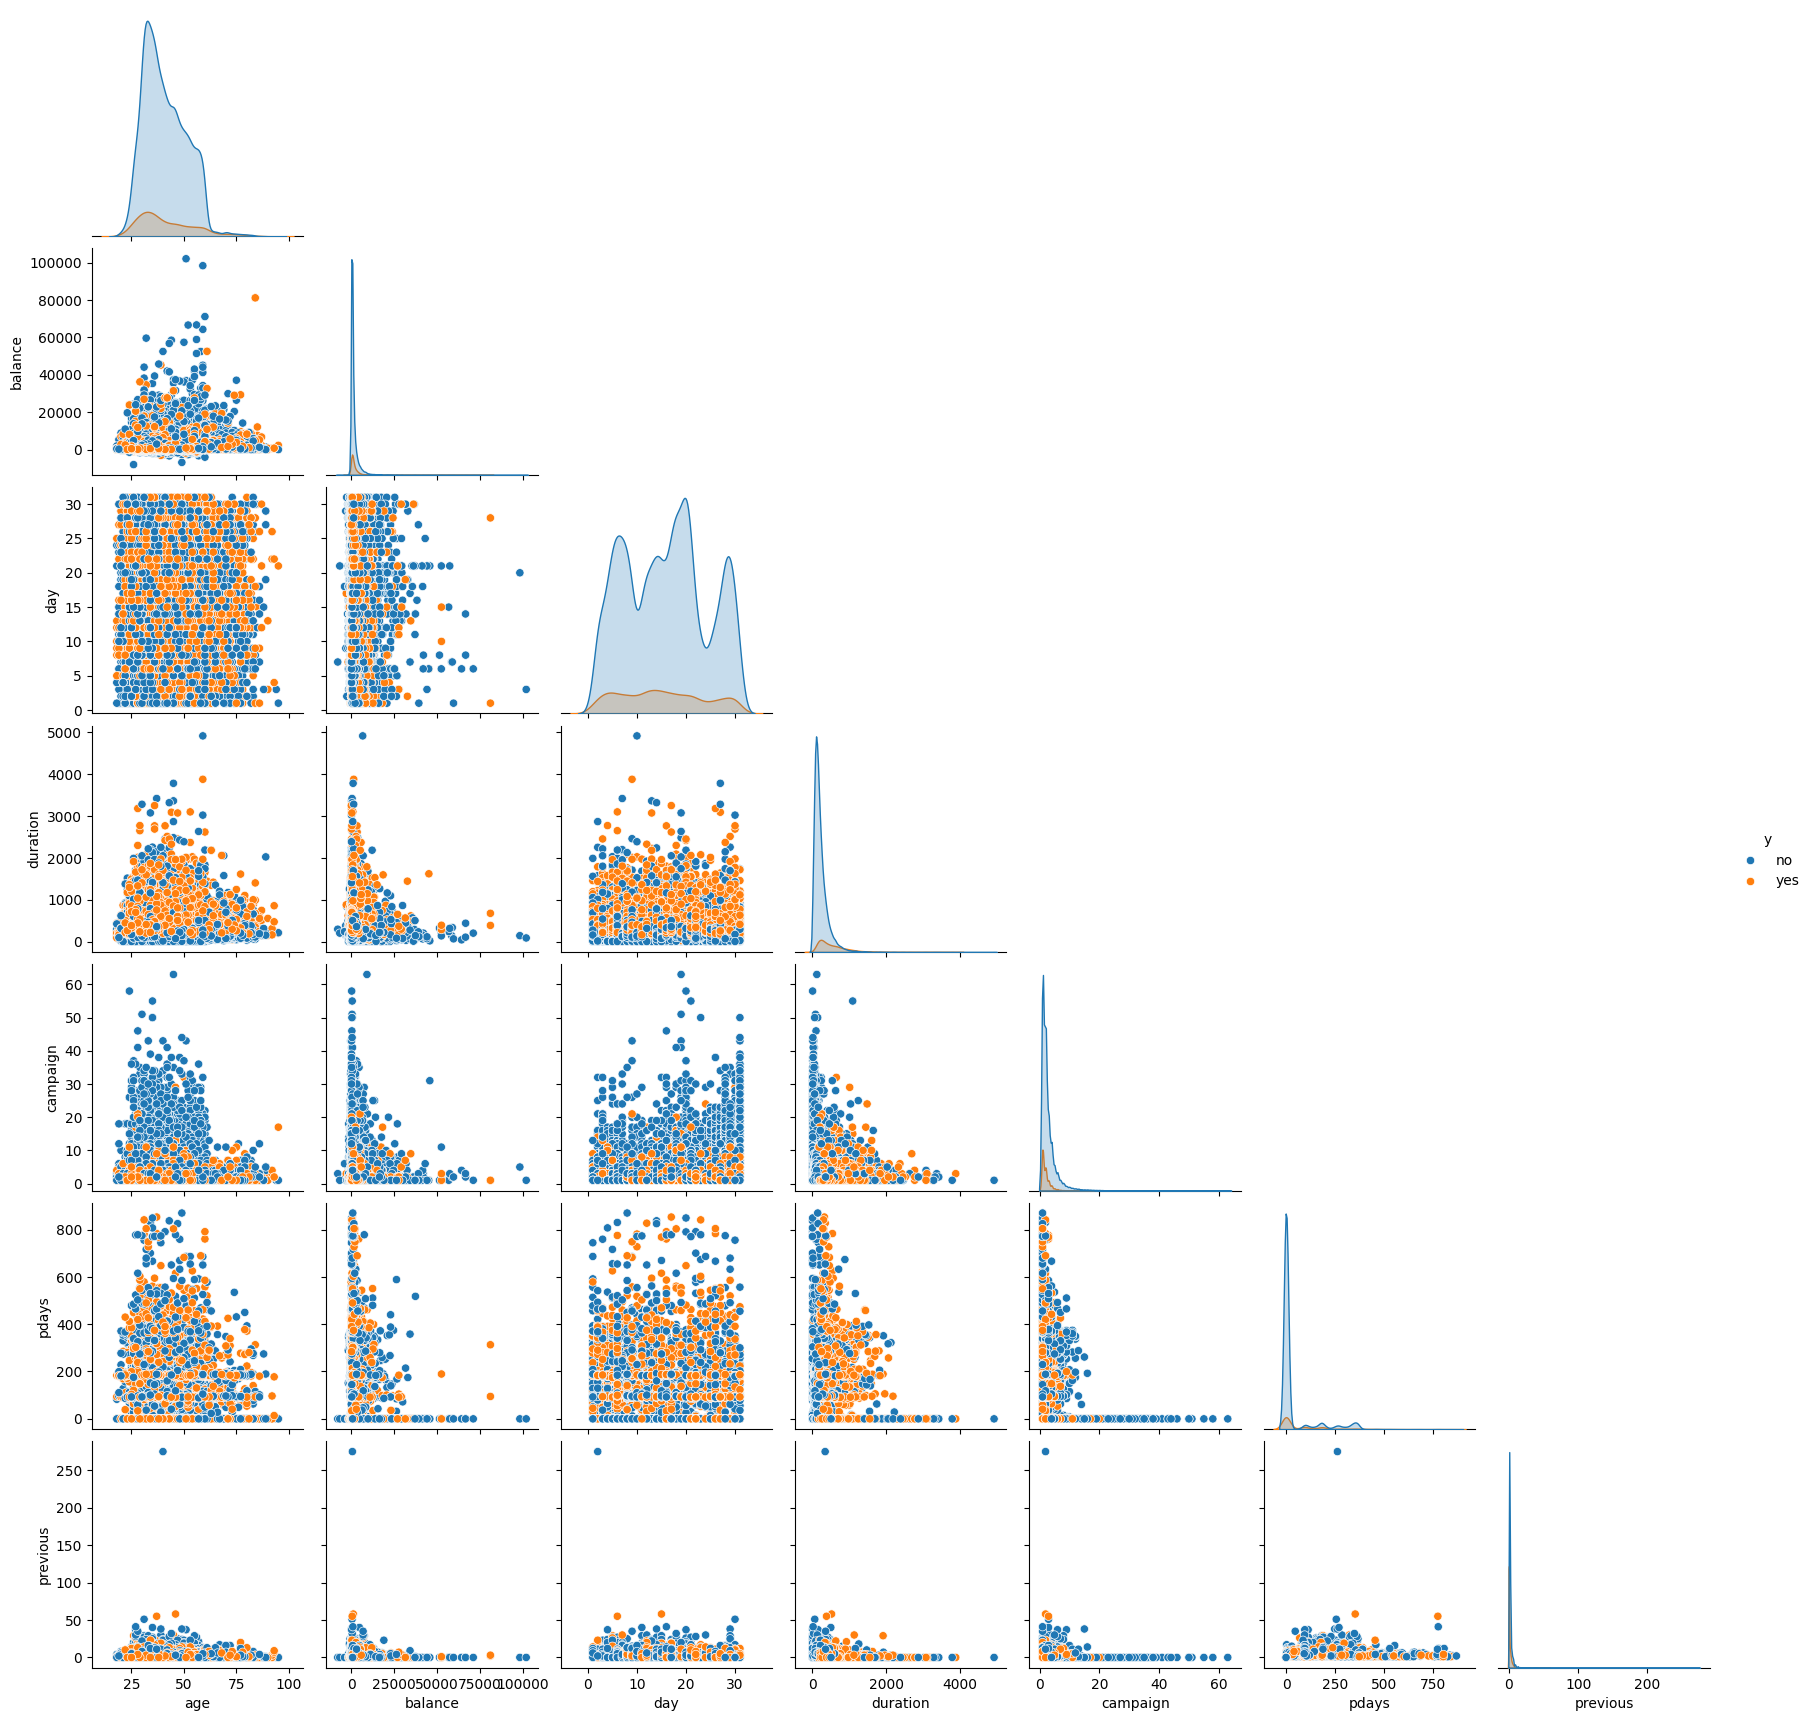

In [108]:
sns.pairplot(df, hue='y', diag_kind='kde', corner=True)
plt.show()


In [55]:
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 age                      0
job                      0
marital                  0
education                0
default                  0
balance                  0
housing                  0
loan                     0
contact                  0
day                      0
month                    0
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome                 0
y                        0
age_group                0
balance_group            0
duration_category        3
campaign_category        0
pdays_category       36954
dtype: int64


In [115]:
# Extract target variable
y = df_encoded['y_yes']  # Ensure you use 'y_yes' for the target variable

# Extract feature columns (excluding the target)
X = df_encoded.drop(['y_yes'], axis=1)
df_encoded.fillna(0, inplace=True)


In [116]:
bins = [18, 30, 45, 60, 80, 100]
labels = ['Young', 'Middle-aged', 'Senior', 'Retired', 'Elderly']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


In [51]:
# Encode categorical columns
df_encoded = pd.get_dummies(df_scaled, drop_first=True)

# Check the new shape of the encoded dataset
print(f"Encoded dataset shape: {df_encoded.shape}")


Encoded dataset shape: (45211, 58)


/var/folders/c8/hfkpwzg52nvg87wzjcq5tpqm0000gn/T/ipykernel_84353/154637667.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_analysis = df.groupby(['balance_group', 'y'])['y'].count().unstack()


y                 no   yes  subscription_rate
balance_group                                
Negative/Zero   6778   502           6.895604
Low            20761  2539          10.896996
Medium          9979  1807          15.331750
High            2404   441          15.500879


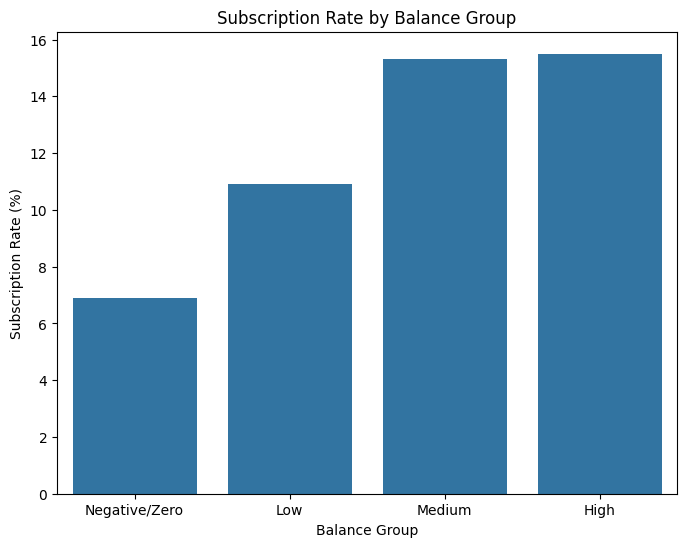

In [113]:
# Analyzing balance vs subscription rate
balance_groups = pd.cut(df['balance'], bins=[-float('inf'), 0, 1000, 5000, float('inf')], 
                        labels=['Negative/Zero', 'Low', 'Medium', 'High'])
df['balance_group'] = balance_groups

# Grouping and calculating subscription rates
balance_analysis = df.groupby(['balance_group', 'y'])['y'].count().unstack()
balance_analysis['subscription_rate'] = (balance_analysis['yes'] / 
                                         (balance_analysis['yes'] + balance_analysis['no'])) * 100

print(balance_analysis)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='balance_group', y='subscription_rate', data=balance_analysis.reset_index())
plt.title('Subscription Rate by Balance Group')
plt.xlabel('Balance Group')
plt.ylabel('Subscription Rate (%)')
plt.show()


/var/folders/c8/hfkpwzg52nvg87wzjcq5tpqm0000gn/T/ipykernel_84353/2174659974.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_analysis = df.groupby(['duration_category', 'y'])['y'].count().unstack()


y                     no   yes  subscription_rate
duration_category                                
Short              10763   117           1.075368
Medium             20340  1714           7.771833
Long                6859  1625          19.153701
Very Long           1957  1833          48.364116


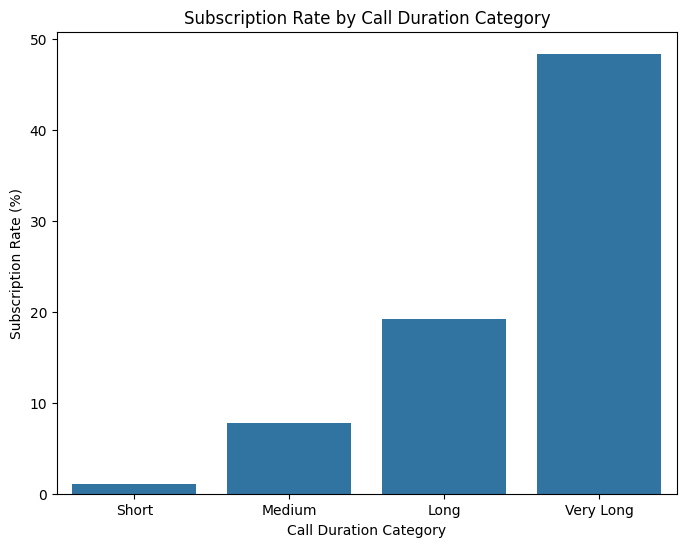

In [112]:
# Binning call duration into categories
duration_bins = pd.cut(df['duration'], bins=[0, 100, 300, 600, float('inf')], 
                       labels=['Short', 'Medium', 'Long', 'Very Long'])
df['duration_category'] = duration_bins

# Grouping and calculating subscription rates
duration_analysis = df.groupby(['duration_category', 'y'])['y'].count().unstack()
duration_analysis['subscription_rate'] = (duration_analysis['yes'] / 
                                          (duration_analysis['yes'] + duration_analysis['no'])) * 100

print(duration_analysis)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='duration_category', y='subscription_rate', data=duration_analysis.reset_index())
plt.title('Subscription Rate by Call Duration Category')
plt.xlabel('Call Duration Category')
plt.ylabel('Subscription Rate (%)')
plt.show()


y                     no   yes  subscription_rate
campaign_category                                
1-2 calls          26087  3962          13.185131
3-5 calls           9733  1074           9.938003
6+ calls            4102   253           5.809414


/var/folders/c8/hfkpwzg52nvg87wzjcq5tpqm0000gn/T/ipykernel_84353/3826268634.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  campaign_analysis = df.groupby(['campaign_category', 'y'])['y'].count().unstack()


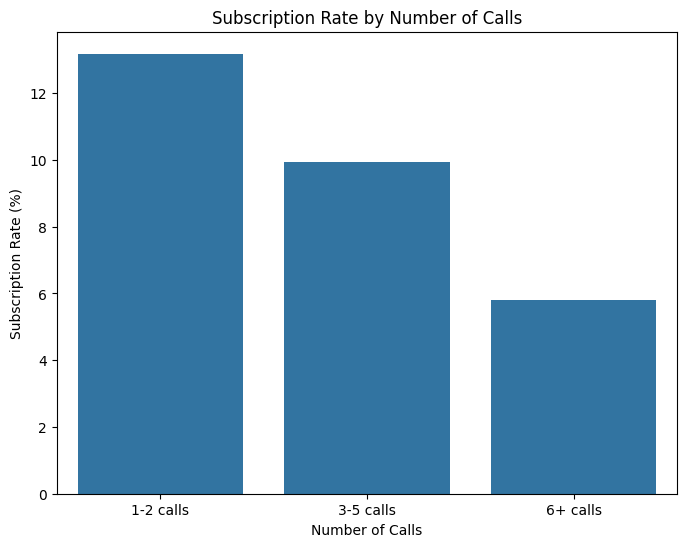

In [31]:
# Binning the campaign variable
campaign_bins = pd.cut(df['campaign'], bins=[0, 2, 5, float('inf')], 
                       labels=['1-2 calls', '3-5 calls', '6+ calls'])
df['campaign_category'] = campaign_bins

# Grouping and calculating subscription rates
campaign_analysis = df.groupby(['campaign_category', 'y'])['y'].count().unstack()
campaign_analysis['subscription_rate'] = (campaign_analysis['yes'] / 
                                          (campaign_analysis['yes'] + campaign_analysis['no'])) * 100

print(campaign_analysis)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='campaign_category', y='subscription_rate', data=campaign_analysis.reset_index())
plt.title('Subscription Rate by Number of Calls')
plt.xlabel('Number of Calls')
plt.ylabel('Subscription Rate (%)')
plt.show()


y                  no   yes  subscription_rate
pdays_category                                
Never Contacted     0     0                NaN
Recent            160    28          14.893617
Medium           2776  1339          32.539490
Long             3416   538          13.606474


/var/folders/c8/hfkpwzg52nvg87wzjcq5tpqm0000gn/T/ipykernel_84353/64081348.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pdays_analysis = df.groupby(['pdays_category', 'y'])['y'].count().unstack()


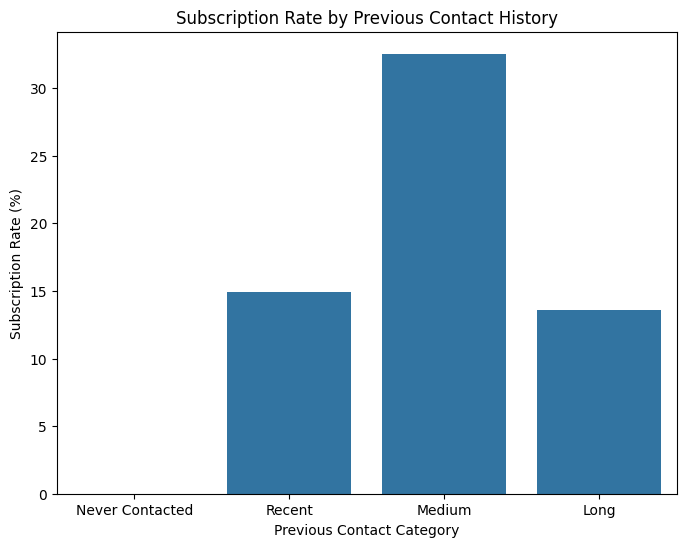

In [53]:
# Binning pdays into categories
pdays_bins = pd.cut(df['pdays'], bins=[-1, 0, 30, 200, float('inf')], 
                    labels=['Never Contacted', 'Recent', 'Medium', 'Long'])
df['pdays_category'] = pdays_bins

# Grouping and calculating subscription rates
pdays_analysis = df.groupby(['pdays_category', 'y'])['y'].count().unstack()
pdays_analysis['subscription_rate'] = (pdays_analysis['yes'] / 
                                       (pdays_analysis['yes'] + pdays_analysis['no'])) * 100

print(pdays_analysis)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='pdays_category', y='subscription_rate', data=pdays_analysis.reset_index())
plt.title('Subscription Rate by Previous Contact History')
plt.xlabel('Previous Contact Category')
plt.ylabel('Subscription Rate (%)')
plt.show()


In [37]:
# Ensure df_scaled is defined
df_scaled = df.copy()  # Create a copy of the original DataFrame

# Feature Creation
df_scaled['duration_campaign'] = df_scaled['duration'] * df_scaled['campaign']

bins = [0, 30, 50, 100]
labels = ['Young', 'Middle-aged', 'Senior']
df_scaled['age_group'] = pd.cut(df_scaled['age'], bins=bins, labels=labels)

df_scaled['balance_duration_ratio'] = df_scaled['balance'] / (df_scaled['duration'] + 1)  # Add 1 to avoid division by zero

# Display the first few rows of the DataFrame
print(df_scaled[['duration_campaign', 'age_group', 'balance_duration_ratio']].head())


   duration_campaign    age_group  balance_duration_ratio
0                261       Senior                8.179389
1                151  Middle-aged                0.190789
2                 76  Middle-aged                0.025974
3                 92  Middle-aged               16.193548
4                198  Middle-aged                0.005025
